## Data 3500: Data Dive 1

**Goals and Main Questions:** 

Explain how insights could be helpful to company/client in simple terms

Present fully functioning code with proper comments throughout

Question 1: What are the top variables influencing sale price (SalePrice)?

Question 2: What are the top variables influencing overall quality (OverallQual)?

Question 3: How does the type of dwelling (MSSubClass) affect the sale price of houses (SalePrice)?

Question 4: How do different types of foundations (Foundation) affect the condition (OverallCond) and quality (OverallQual) of houses?

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#widen screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Data Exploration

In [2]:
#import the data
data = pd.read_csv('housing.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
print(data)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


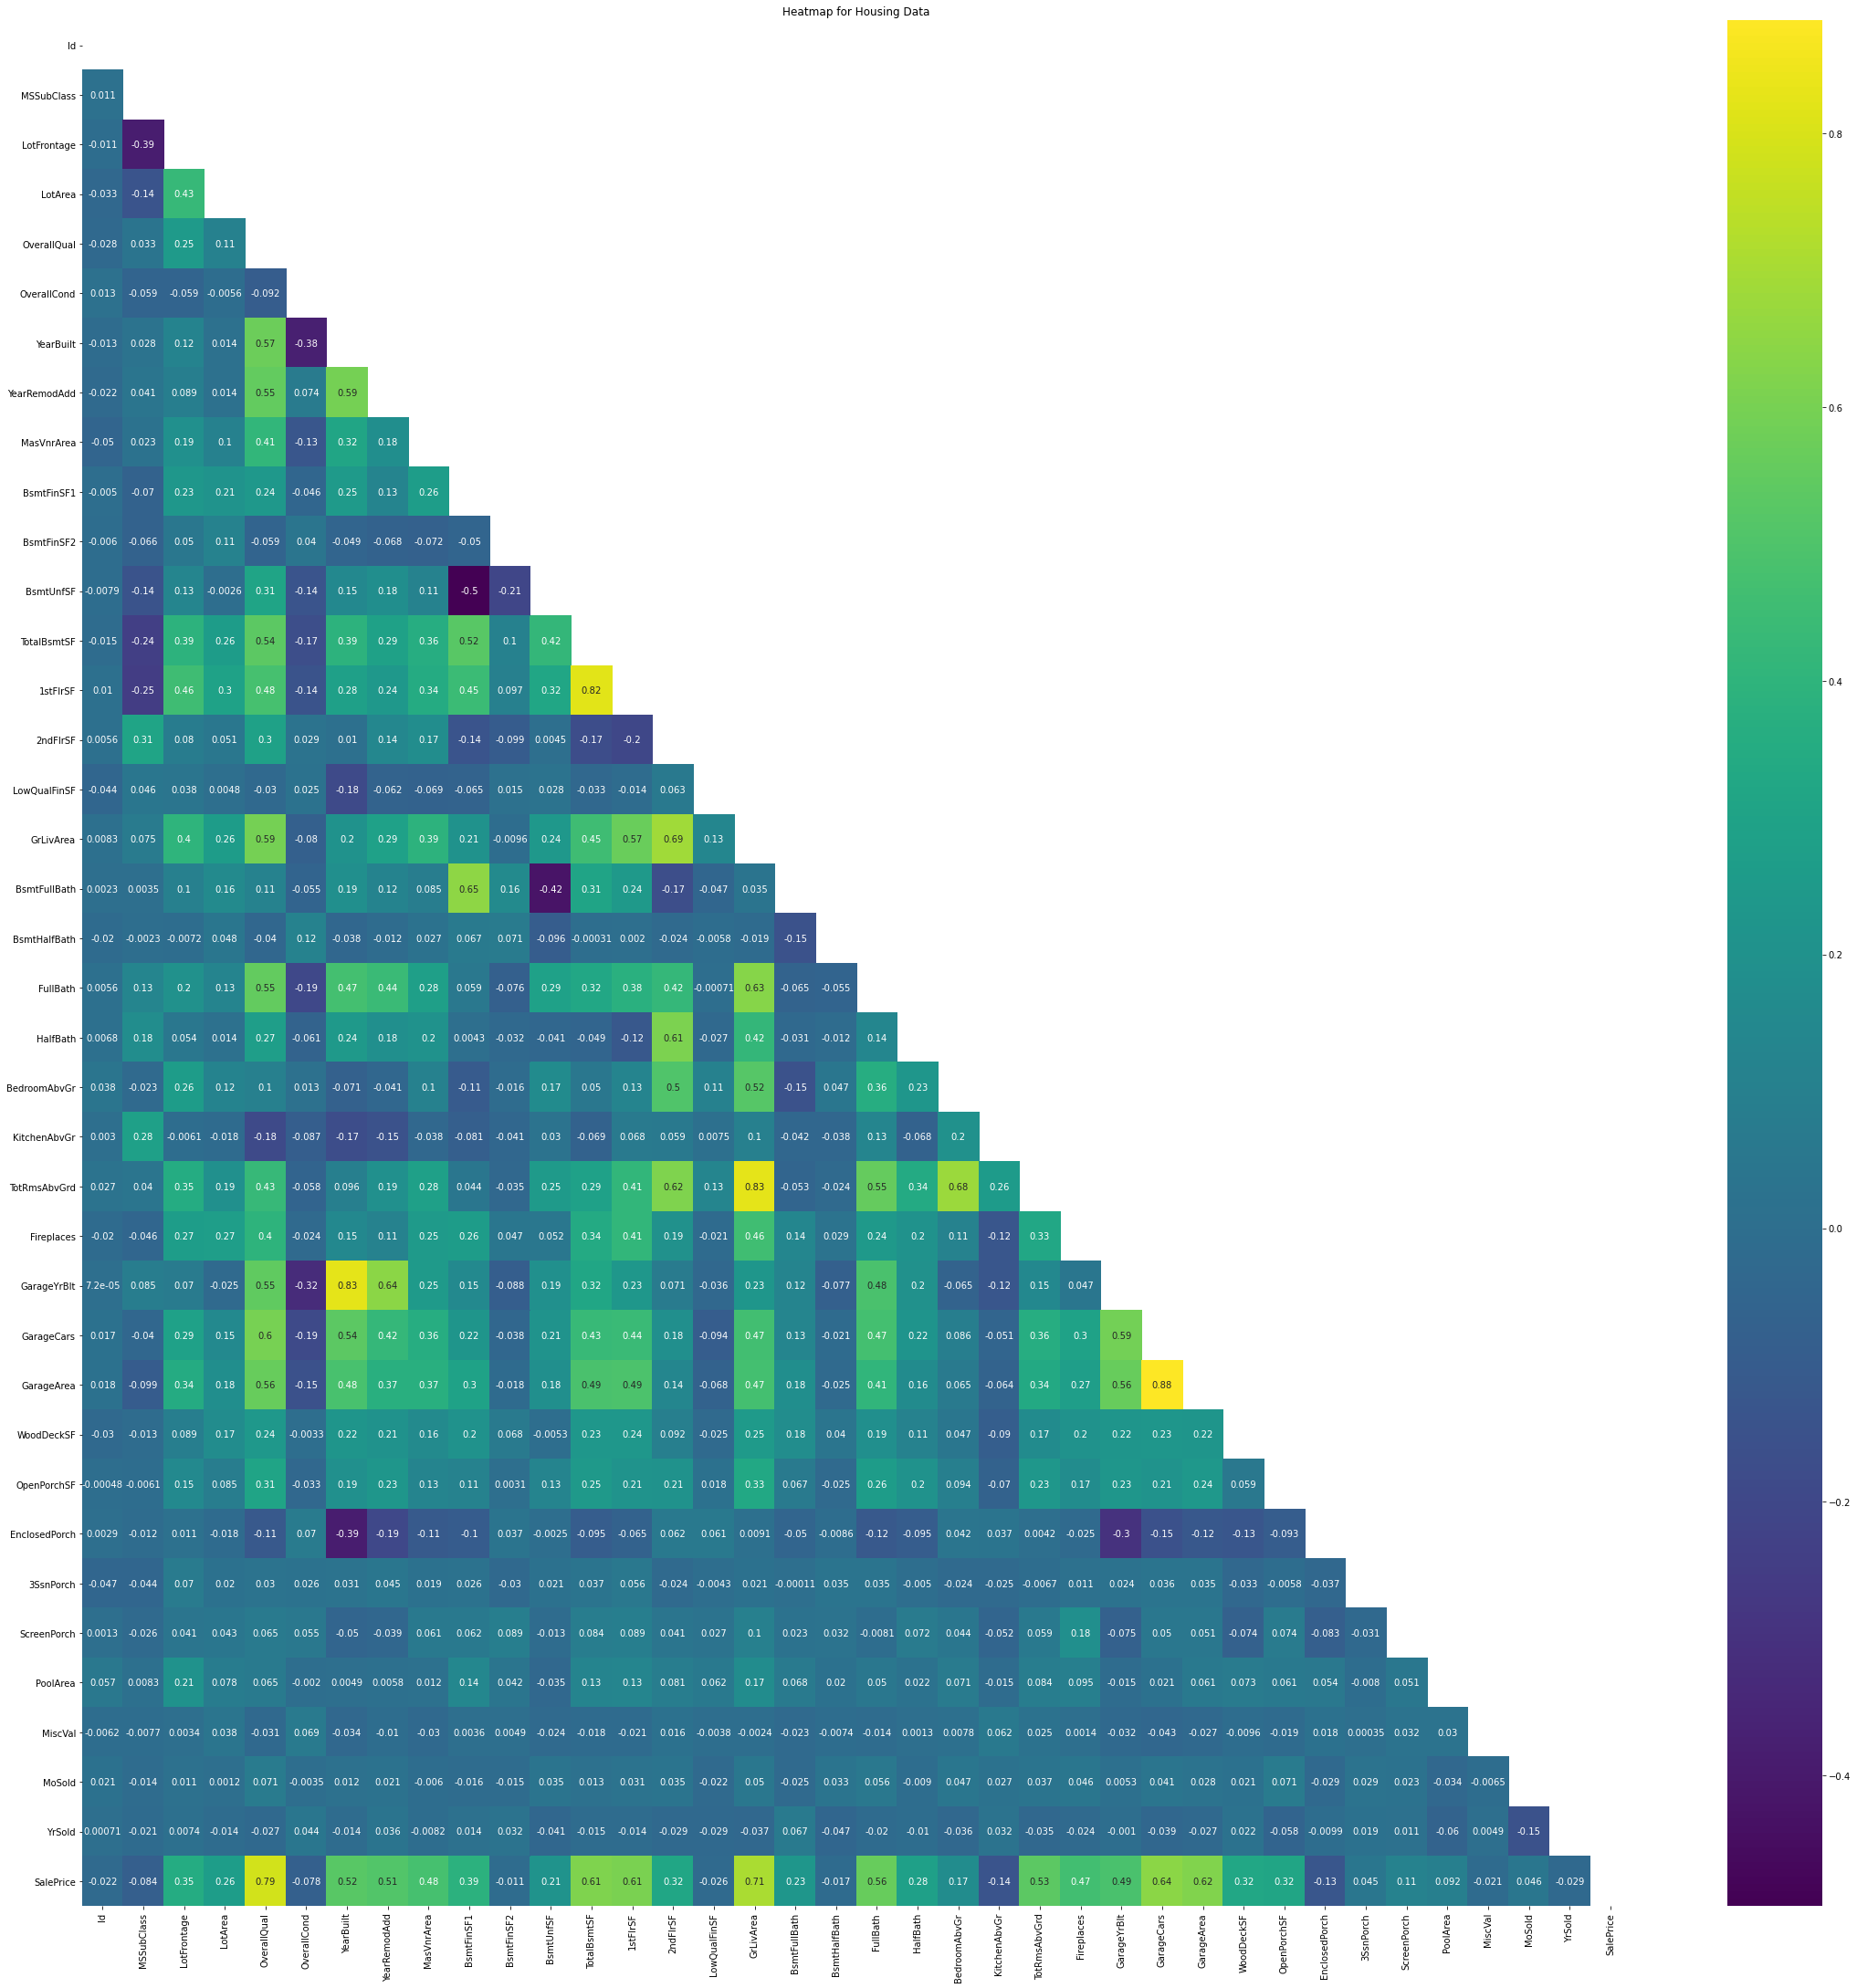

In [5]:
#correlation heatmap for numeric variables
mask = np.triu(np.ones_like(data.corr()))
#figure details
plt.figure(figsize=(38, 38))
plt.title("Heatmap for Housing Data")
sns.heatmap(data.corr(), cmap="viridis", annot=True, mask = mask)

#displaying heatmap
plt.show()

Some variables with correlations that stick out (over 0.5) are:

GarageArea &: GarageYrBlt, GarageCars

GarageCars &: YearBuilt, GarageYrBlt

GarageYrBlt &: YearBuilt, YearRemodAdd

TotRmsAbvGrd &: 2ndFlrSF, GrLivArea, FullBath, BedroomAbvGr

BedroomAbvGr &: 2ndFlrSF, GrLivArea

HalfBath &: 2ndFlrSF

FullBath &: GrLivArea

BsmtFullBath &: BsmtFinSF1

GrLivArea &: 1stFlrSF, 2ndFlrSF

1stFlrSF &: TotalBsmtSF

TotalBsmtSF &: BsmtFinSF1

YearRemodAdd &: YearBuilt

Top 9 variables with highest correlation for OverallQual: YearBuilt, YearRemodAdd, TotalBsmtSF, GrLivArea, FullBath, GarageYrBlt, GarageCars, GarageArea, SalePrice

Top 10 variables with highest correlation for SalePrice: OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea

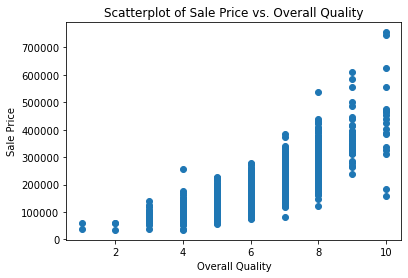

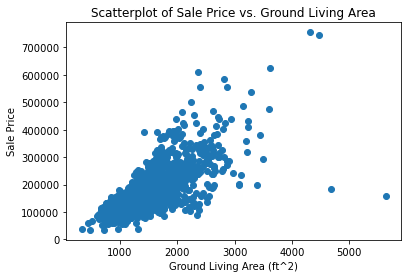

In [6]:
#scatterplot for OverallQual and SalePrice
x = data['OverallQual']
y = data['SalePrice']

#make scatterplot
plt.scatter(x, y)

#labels and title
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('Scatterplot of Sale Price vs. Overall Quality')

plt.show()

#scatterplot for GrLivArea and SalePrice
x = data['GrLivArea']
y = data['SalePrice']

#make scatterplot
plt.scatter(x, y)

#labels and title
plt.xlabel('Ground Living Area (ft^2)')
plt.ylabel('Sale Price')
plt.title('Scatterplot of Sale Price vs. Ground Living Area')

plt.show()

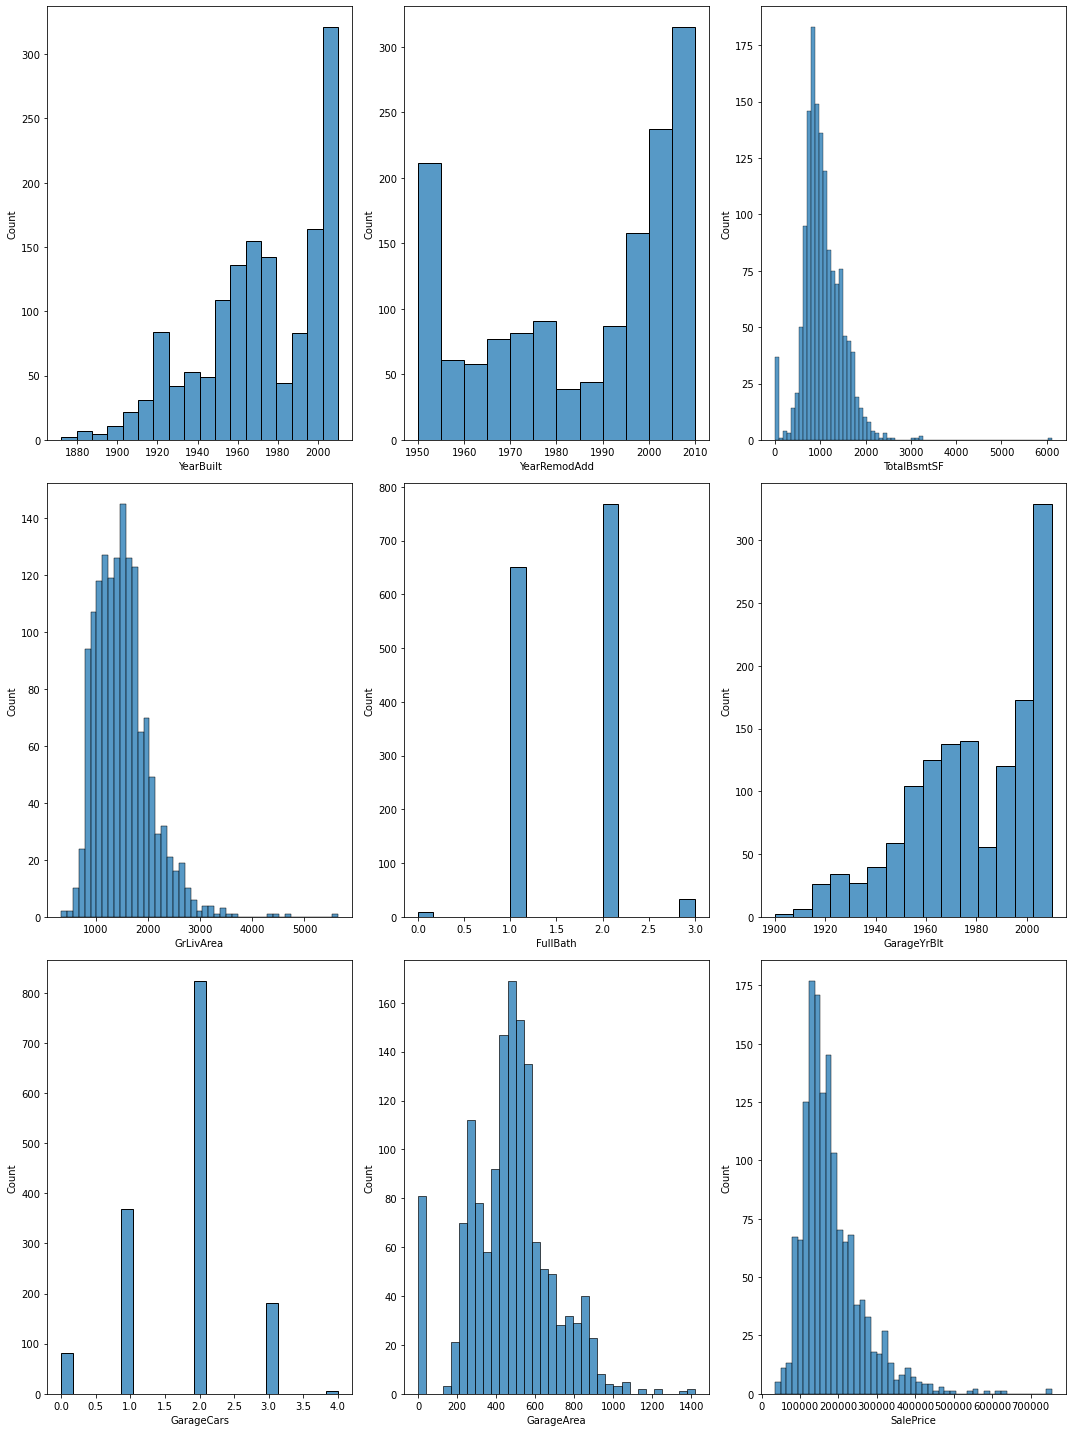

In [7]:
#histogram for all of OverallQual high cor variables
high_cor_Qual = data[['YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']]

fig, axes = plt.subplots(3, 3, figsize=(15, 20))

#loop through the columns and plot them in the subplots
for i, column in enumerate(high_cor_Qual):
    row = i // 3
    col = i % 3
    sns.histplot(data[column], ax=axes[row, col])

plt.tight_layout()
plt.show()

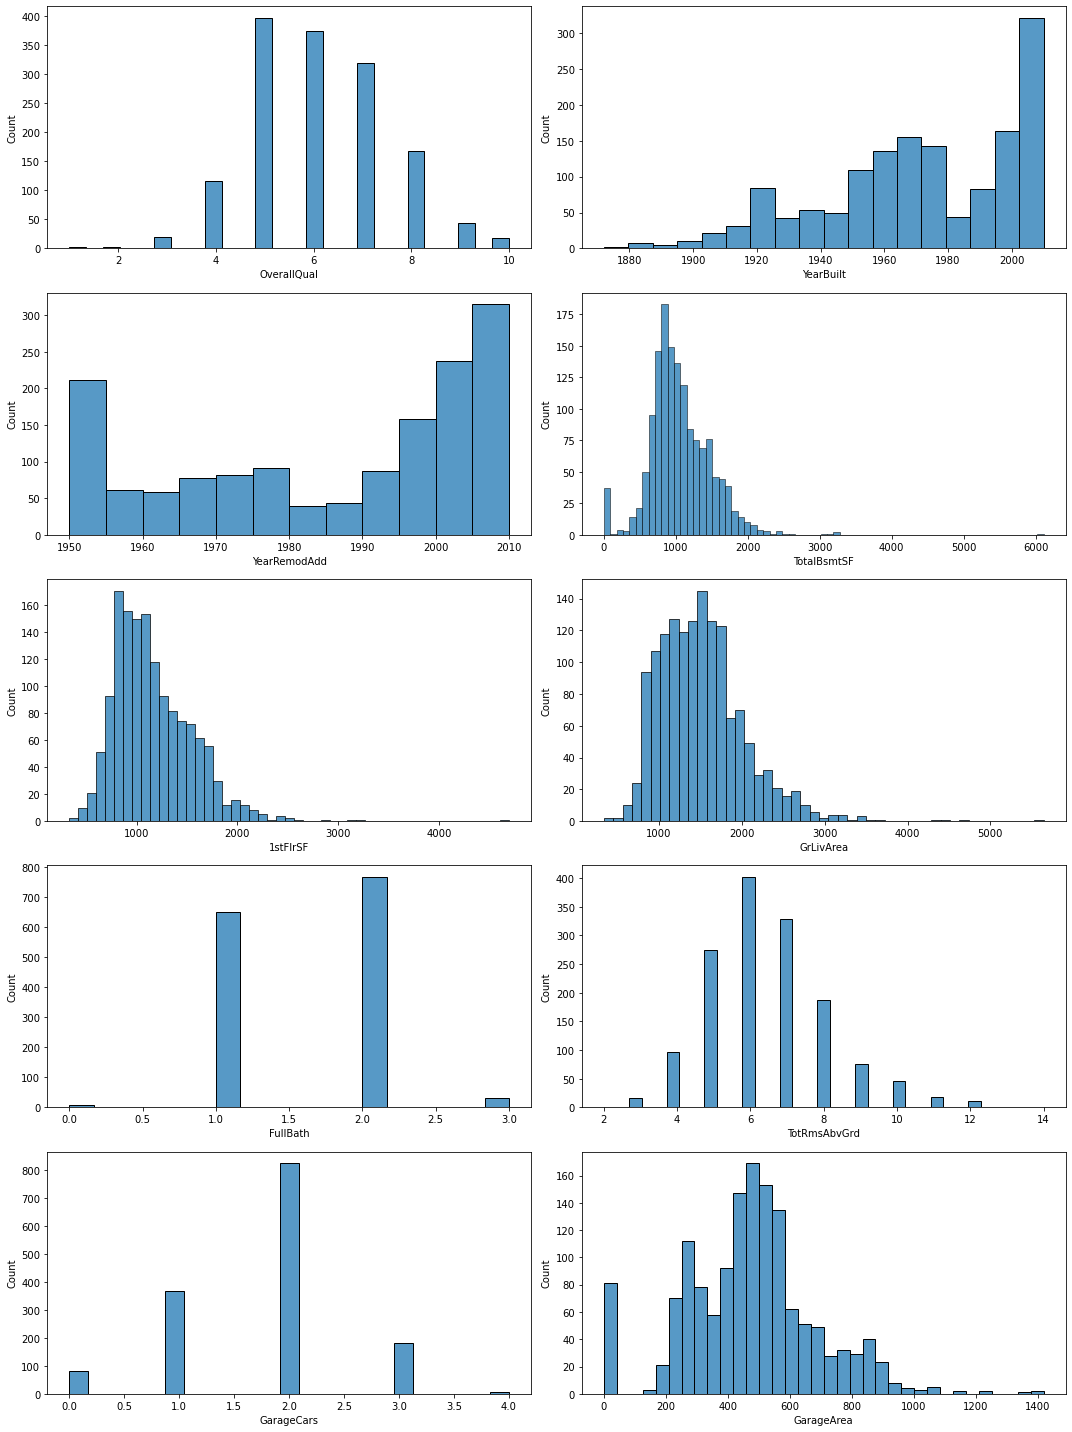

In [8]:
#histogram for all of SalePrice high cor variables
#separating numerical data
high_cor_Price = data[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']]

fig, axes = plt.subplots(5, 2, figsize=(15, 20))

#loop through the columns and plot them in the subplots
for i, column in enumerate(high_cor_Price):
    row = i // 2
    col = i % 2
    sns.histplot(data[column], ax=axes[row, col])

plt.tight_layout()
plt.show()

## Data Preprocessing

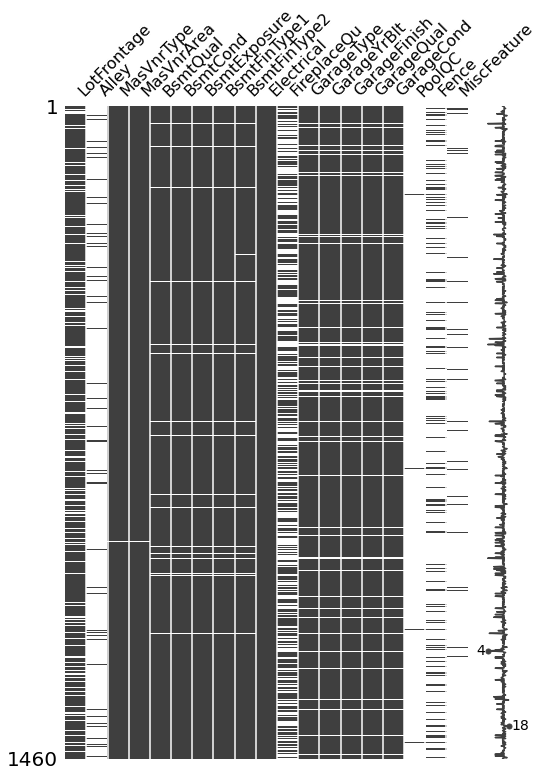

In [9]:
#matrix of missing values for only variables with missing data
msno.matrix(data[data.columns[data.isnull().any()]], figsize=(8, 12))
plt.show()

In [10]:
#drop missing values with under 1000 non-null
#get list of columns with non-null counts less than 1000
columns_to_drop = [column for column in data.columns if data[column].count() < 1000]

print("The columns being dropped are: ", columns_to_drop)

#drop the columns
data = data.drop(columns=columns_to_drop)

The columns being dropped are:  ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [11]:
#checking which columns have missing values
missing_values = data.isnull().sum()

#print columns with missing values and the count of missing values
for column, count in missing_values.items():
    if count > 0:
        print(f"Column '{column}' has {count} missing values.")

Column 'LotFrontage' has 259 missing values.
Column 'MasVnrType' has 8 missing values.
Column 'MasVnrArea' has 8 missing values.
Column 'BsmtQual' has 37 missing values.
Column 'BsmtCond' has 37 missing values.
Column 'BsmtExposure' has 38 missing values.
Column 'BsmtFinType1' has 37 missing values.
Column 'BsmtFinType2' has 38 missing values.
Column 'Electrical' has 1 missing values.
Column 'GarageType' has 81 missing values.
Column 'GarageYrBlt' has 81 missing values.
Column 'GarageFinish' has 81 missing values.
Column 'GarageQual' has 81 missing values.
Column 'GarageCond' has 81 missing values.


'LotFrontage' is the linear feet of street connected to property, so I'm going to use the median

'MasVnrType' is an ordinal variable of the masonry veneer type, I'm going to fill with 'None' to mean no masonry veneer

'MasVnrArea' is the area of the variable above, filled with 0

'BsmtQual' is the height of the basement, filling with 'NA' to mean no basement

'BsmtCond' is the general condition of the basement, filling with 'NA' to mean no basement

'BsmtExposure' is the walkout or garden level walls, filling with 'NA' to mean no basement

'BsmtFinType1' is the rating of basement finished areas, filling with 'NA' to mean no basement

'BsmtFinType2' is the rating of basement finished areas (if mult. types), filling with 'NA' to mean no basement

'Electrical' is the electrical system, filling with 'SBrkr'

'GarageType' is the garage location, filling with 'NA' to mean no garage

'GarageYrBlt' is the year the garage was built, even though I am treating the missing values as no garage, I can't use zero for this. I'm going to use the median

'GarageFinish' is the interior finish of the garage, filling with 'NA' to mean no garage

'GarageQual' is the garage quality, filling with 'NA' to mean no garage

'GarageCond' is the garage condition, filling with 'NA' to mean no garage

Filled with 'None': 'MasVnrType'

Filled with 'NA': 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'

Filled with 'SBrkr': Electrical

Filled with 0: 'MasVnrArea'

Filled with median: 'LotFrontage', 'GarageYrBlt'

In [12]:
#fill 'MasVnrType' with 'None'
data['MasVnrType'].fillna('None', inplace=True)

#fill with 'NA'
data['BsmtQual'].fillna('NA', inplace=True)
data['BsmtCond'].fillna('NA', inplace=True)
data['BsmtExposure'].fillna('NA', inplace=True)
data['BsmtFinType1'].fillna('NA', inplace=True)
data['BsmtFinType2'].fillna('NA', inplace=True)
data['GarageType'].fillna('NA', inplace=True)
data['GarageFinish'].fillna('NA', inplace=True)
data['GarageQual'].fillna('NA', inplace=True)
data['GarageCond'].fillna('NA', inplace=True)

#fill 'Electrical' with 'SBrkr'
data['Electrical'].fillna('SBrkr', inplace=True)

#fill with 0
data['MasVnrArea'].fillna(0, inplace=True)

#fill 'LotFrontage' and GarageYrBlt' with median
lot_med = data['LotFrontage'].median()
data['LotFrontage'].fillna(lot_med, inplace=True)

garage_med = data['GarageYrBlt'].median()
data['GarageYrBlt'].fillna(garage_med, inplace=True)

In [13]:
#creating dummy variables for catagorical data
#finding all categorical variables
data_cat = data.select_dtypes(include=['object'])
cat = list(data_cat.columns)

# Create dummy variables for the remaining categorical variables
dummy = pd.get_dummies(data[cat], drop_first=True)

#concatenate dummy variables with the original df
data = pd.concat([data, dummy], axis=1)

#drop the original categorical variables
data.drop(cat, axis=1, inplace=True)

#checking that the new features are correct
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


## Data Analysis

### Question 1: What are the top variables influencing sale price?

In [14]:
#define x and y for our question
X = data.drop('SalePrice', axis=1)  
y = data['SalePrice']  

#add constant variable for our model
X = sm.add_constant(X)

#split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()

#original model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     58.04
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:26:29   Log-Likelihood:                -13212.
No. Observations:                1168   AIC:                         2.689e+04
Df Residuals:                     937   BIC:                         2.805e+04
Df Model:                         230                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.142e+

In [15]:
#function that loops through model and removes p-values higher than 0.05
def backward_elimination_model(x, y, sig=0.05):
    num = x.shape[1]
    while True:
        model = sm.OLS(y, x).fit() #fit model
        max_p = max(model.pvalues) #find biggest p-val
        
        #if p-val bigger than significance level, drop
        if max_p > sig:
            j = model.pvalues.idxmax()
            x = x.drop(columns=[j])
        else:
            break

    return model

#call backward elimination function
final_model = backward_elimination_model(X_train, y_train)

#final model
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     170.6
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:26:33   Log-Likelihood:                -13288.
No. Observations:                1168   AIC:                         2.674e+04
Df Residuals:                    1088   BIC:                         2.714e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.479e+

In [16]:
#finding the correlation coefficients for the variables <0.05
#names of variables included in final model
sig_var = final_model.model.exog_names

#calc correlation coefficients
cor_coe = X_train[sig_var].corrwith(y_train)

#print variables with correlation coefficients above 0.5
print("Correlation coefficients for variables in the final model:")
for variable, coefficient in cor_coe.items():
    if coefficient > 0.5:
        print(f"{variable}: {coefficient}")

Correlation coefficients for variables in the final model:
OverallQual: 0.7855547508295235
YearBuilt: 0.5165007897173509
YearRemodAdd: 0.5085928623194933
TotalBsmtSF: 0.5977658678072629
GrLivArea: 0.69565191449678
TotRmsAbvGrd: 0.5203884422148097
GarageArea: 0.6241388844307463


In [17]:
#model with only those variables
selected_columns = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageArea']

X = data[selected_columns]  
y = data['SalePrice']  

#add constant variable for our model
X = sm.add_constant(X)

#split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()

#model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     525.5
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:26:33   Log-Likelihood:                -13969.
No. Observations:                1168   AIC:                         2.795e+04
Df Residuals:                    1160   BIC:                         2.799e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.173e+06   1.32e+05     -8.911   

In [18]:
#it looks like we can remove 'TotRmsAbvGrd' too
selected_columns = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'GarageArea']

X = data[selected_columns]  
y = data['SalePrice']  

#add constant variable for our model
X = sm.add_constant(X)

#split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()

#model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     613.6
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:26:33   Log-Likelihood:                -13969.
No. Observations:                1168   AIC:                         2.795e+04
Df Residuals:                    1161   BIC:                         2.799e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.171e+06   1.31e+05     -8.906   

$$\hat{SalePrice} = -1171000 + 19730OverallQual + 261.6915YearBuilt + 299.0890YearRemodAdd + 24.1180TotalBsmtSF + 48.3250GrLivArea + 47.4855GarageArea$$

In [19]:
#measure the model accuracy
X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
test_mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
test_rmse = np.sqrt(test_mse)

# Calculate Mean Absolute Error (MAE)
test_mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R^2)
test_r_squared = r2_score(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Test RMSE:", test_rmse)
print("Test R-squared:", test_r_squared)
print("Test MAPE:", test_mape)

Test RMSE: 39606.82180960011
Test R-squared: 0.7954845346228513
Test MAPE: 14.759711051320467


RMSE: On average, the model's predictions are off by around $39,606.82 in terms of 'SalePrice'

R-squared: The model explains 79.55% of the variance in 'SalePrice'

MAPE: On average, the model's predictions are off by about 14.76% compared to the actual 'SalePrice' values

### Question 2: What are the top variables influencing overall quality?

In [20]:
#define x and y for our question
X = data.drop('OverallQual', axis=1)  
y = data['OverallQual']  

#add constant variable for our model
X = sm.add_constant(X)

#split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()

#original model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            OverallQual   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     19.81
Date:                Fri, 03 Nov 2023   Prob (F-statistic):          3.99e-246
Time:                        19:26:33   Log-Likelihood:                -989.63
No. Observations:                1168   AIC:                             2441.
Df Residuals:                     937   BIC:                             3611.
Df Model:                         230                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -7.64

In [21]:
#call backward elimination function
final_model = backward_elimination_model(X_train, y_train)

#final model
print(final_model.summary())

                                 OLS Regression Results                                
Dep. Variable:            OverallQual   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              2200.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):                        0.00
Time:                        19:26:38   Log-Likelihood:                         -1080.8
No. Observations:                1168   AIC:                                      2268.
Df Residuals:                    1115   BIC:                                      2536.
Df Model:                          53                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [22]:
#finding the correlation coefficients for the variables >0.05
#names of variables included in final model
sig_var = final_model.model.exog_names

#calc correlation coefficients
cor_coe = X_train[sig_var].corrwith(y_train)

#print variables with correlation coefficients above 0.5
print("Correlation coefficients for variables in the final model:")
for variable, coefficient in cor_coe.items():
    if coefficient > 0.5:
        print(f"{variable}: {coefficient}")

Correlation coefficients for variables in the final model:
YearBuilt: 0.5581235590776075
YearRemodAdd: 0.5382505108641499
TotalBsmtSF: 0.5295570178624599
SalePrice: 0.7855547508295234
Foundation_PConc: 0.5504212245420442


In [23]:
#model with only those variables
selected_columns = ['YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'SalePrice', 'Foundation_PConc']

X = data[selected_columns]  
y = data['OverallQual']  

#add constant variable for our model
X = sm.add_constant(X)

#split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()

#model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            OverallQual   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     473.2
Date:                Fri, 03 Nov 2023   Prob (F-statistic):          3.47e-277
Time:                        19:26:38   Log-Likelihood:                -1373.9
No. Observations:                1168   AIC:                             2760.
Df Residuals:                    1162   BIC:                             2790.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -15.9652      3.055  

$$\hat{OverallQual} = -15.9652 + 0.0039YearBuilt + 0.0061YearRemodAdd + 0.0003TotalBsmtSF + 0.0000102SalePrice + 0.3714Foundation_PConc$$

In [24]:
#measure the model accuracy
X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
test_mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
test_rmse = np.sqrt(test_mse)

# Calculate Mean Absolute Error (MAE)
test_mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R^2)
test_r_squared = r2_score(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Test RMSE:", test_rmse)
print("Test R-squared:", test_r_squared)
print("Test MAPE:", test_mape)

Test RMSE: 0.749992698074713
Test R-squared: 0.7285038515631974
Test MAPE: 10.89920505640766


RMSE: On average, the model's predictions are off by around 0.75 in terms of 'OverallQual'

R-squared: The model explains 72.85% of the variance in 'OverallQual'

MAPE: On average, the model's predictions are off by about 10.90% compared to the actual 'OverallQual' values

### Question 3: How does the type of dwelling (MSSubClass) affect the sale price of houses?

When using the dummy variables for the last 2 questions, it was leaving some of the variables out and I don't know why. For example, this one wouldn't let me use _20 and _150 and if I printed the variables that started with 'MSSubClass' they weren't in there.

In [25]:
#turning the MSSubClass to dummy variables to make it easier to interpret
data = pd.get_dummies(data, columns=['MSSubClass'], prefix='MSSubClass', drop_first=True)

In [26]:
#define x and y for our question
selected_columns = ['MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 
         'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190']

X = data[selected_columns] 
y = data['SalePrice'] 

#add constant variable for our model
X = sm.add_constant(X)

#split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()

#original model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     27.47
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           1.15e-62
Time:                        19:26:38   Log-Likelihood:                -14635.
No. Observations:                1168   AIC:                         2.930e+04
Df Residuals:                    1153   BIC:                         2.938e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.854e+05   3231.086     57.

In [27]:
#call backward elimination function
final_model = backward_elimination_model(X_train, y_train)

#final model
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     37.97
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           8.87e-65
Time:                        19:26:38   Log-Likelihood:                -14637.
No. Observations:                1168   AIC:                         2.930e+04
Df Residuals:                    1157   BIC:                         2.935e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.831e+05   2873.587     63.

### Question 4: How do different types of foundations (Foundation) affect the condition (OverallCond) and quality (OverallQual) of houses?

In [28]:
#model with Foundation and OverallCond
#define x and y for our question
selected_columns = ['Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood']

X = data[selected_columns]
y = data['OverallCond']  

#add constant variable for our model
X = sm.add_constant(X)

#split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()

#original model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            OverallCond   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     34.35
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           8.17e-33
Time:                        19:26:38   Log-Likelihood:                -1704.6
No. Observations:                1168   AIC:                             3421.
Df Residuals:                    1162   BIC:                             3452.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.2586      0.09

In [29]:
#call backward elimination function
final_model = backward_elimination_model(X_train, y_train)

#final model
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:            OverallCond   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     56.03
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           7.86e-34
Time:                        19:26:38   Log-Likelihood:                -1706.3
No. Observations:                1168   AIC:                             3421.
Df Residuals:                    1164   BIC:                             3441.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.2742      0.09

In [30]:
#model with Foundation and OverallQual
#define x and y for our question
selected_columns = ['Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood']

X = data[selected_columns]
y = data['OverallQual']

#add constant variable for our model
X = sm.add_constant(X)

#split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()

#original model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            OverallQual   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     110.3
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           1.79e-95
Time:                        19:26:38   Log-Likelihood:                -1795.6
No. Observations:                1168   AIC:                             3603.
Df Residuals:                    1162   BIC:                             3634.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5690      0.10

In [31]:
#call backward elimination function
final_model = backward_elimination_model(X_train, y_train)

#final model
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:            OverallQual   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     272.7
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           7.12e-98
Time:                        19:26:38   Log-Likelihood:                -1798.2
No. Observations:                1168   AIC:                             3602.
Df Residuals:                    1165   BIC:                             3618.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.4889      0.045  